# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

In this project, i will scrape a data from the website https://www.exchange-rates.org/history/IDR/USD/TI, which is about the historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD). From this data, I will visualize the data with a flaskdash board. The data that be visualized is the highest, lowest and average money exchange rates every month (from June, 1st 2020 until November, 25th 2020)

This notebook also contains the steps I took to perform web scrapping using `BeautifulSoup` and data visualization with flask dashboard. The steps are described below :
1. Requesting the Data and Creating a BeautifulSoup
2. Finding the right key to scrap the data & Extracting the right information
3. Creating data frame & Data wrangling \
    a. Put the array into dataframe \
    b. Do data cleaning dan data wrangling \
    c. First data visualization using `matplotlib` \
    d. Implementing webscrapping to the flask dashboard
4. Analysis and Conclusion


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.n

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-26-2020">
     14,090.70769
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-26-2020">
     USD IDR rate for 11/26/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/25/2020
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/R


In [6]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>,
 <tr><td>11/25/2020</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/11-25-2020">14,136.09929</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-25-2020">USD IDR rate for 11/25/2020</a></td></tr>]

Do the scrapping process here (please change this markdown with your explanation)

In [7]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    #scrapping process
    row = table.find_all('tr')[i]
    
    #get daily price (harga harian)
    daily_price = row.find_all('td')[2].text
    daily_price = daily_price.strip() #for removing the excess whitespace
    
    #get date (tanggal)
    date = row.find_all('td')[0].text
    date = date.strip() #for removing the excess whitespace
    
    temp.append((date,daily_price)) 
     
temp 

[('11/25/2020', '14,136.09929 IDR'),
 ('11/24/2020', '14,137.48161 IDR'),
 ('11/23/2020', '14,185.57119 IDR'),
 ('11/20/2020', '14,162.60519 IDR'),
 ('11/19/2020', '14,165.50144 IDR'),
 ('11/18/2020', '14,051.29503 IDR'),
 ('11/17/2020', '14,040.16051 IDR'),
 ('11/16/2020', '14,085.69501 IDR'),
 ('11/13/2020', '14,142.77143 IDR'),
 ('11/12/2020', '14,141.24303 IDR'),
 ('11/11/2020', '14,073.46024 IDR'),
 ('11/10/2020', '14,053.76135 IDR'),
 ('11/9/2020', '14,283.29667 IDR'),
 ('11/6/2020', '14,214.49744 IDR'),
 ('11/5/2020', '14,389.14027 IDR'),
 ('11/4/2020', '14,544.44634 IDR'),
 ('11/3/2020', '14,589.01774 IDR'),
 ('11/2/2020', '14,612.89990 IDR'),
 ('10/30/2020', '14,629.16216 IDR'),
 ('10/29/2020', '14,701.62361 IDR'),
 ('10/28/2020', '14,701.92586 IDR'),
 ('10/27/2020', '14,649.78960 IDR'),
 ('10/26/2020', '14,652.88010 IDR'),
 ('10/23/2020', '14,655.04157 IDR'),
 ('10/22/2020', '14,647.90877 IDR'),
 ('10/21/2020', '14,641.61060 IDR'),
 ('10/20/2020', '14,555.88071 IDR'),
 ('10/1

In [8]:
#reverses the order of dates from past time to recent time
temp = temp[::-1]
temp

[('5/31/2020', '14,664.14584 IDR'),
 ('6/1/2020', '14,586.73900 IDR'),
 ('6/2/2020', '14,382.27395 IDR'),
 ('6/3/2020', '14,060.78946 IDR'),
 ('6/4/2020', '14,113.82802 IDR'),
 ('6/5/2020', '14,305.96407 IDR'),
 ('6/7/2020', '13,989.39489 IDR'),
 ('6/8/2020', '13,867.95377 IDR'),
 ('6/9/2020', '13,870.75718 IDR'),
 ('6/10/2020', '13,976.91611 IDR'),
 ('6/11/2020', '13,966.85142 IDR'),
 ('6/12/2020', '14,121.55442 IDR'),
 ('6/14/2020', '14,145.23543 IDR'),
 ('6/15/2020', '14,021.62200 IDR'),
 ('6/16/2020', '14,046.73959 IDR'),
 ('6/17/2020', '14,120.02241 IDR'),
 ('6/18/2020', '14,095.36729 IDR'),
 ('6/19/2020', '14,077.63950 IDR'),
 ('6/21/2020', '14,068.55627 IDR'),
 ('6/22/2020', '14,136.05128 IDR'),
 ('6/23/2020', '14,148.27391 IDR'),
 ('6/24/2020', '14,143.17320 IDR'),
 ('6/25/2020', '14,130.57047 IDR'),
 ('6/26/2020', '14,190.21303 IDR'),
 ('6/28/2020', '14,185.08225 IDR'),
 ('6/29/2020', '14,183.53912 IDR'),
 ('6/30/2020', '14,296.90560 IDR'),
 ('7/1/2020', '14,256.13040 IDR'),
 

## Creating data frame & Data wrangling

### Put the array into dataframe

In [42]:
import pandas as pd
import matplotlib as plt

df = pd.DataFrame(temp, columns=('date','daily_price'))
df.head(3)

,date,daily_price
0,5/31/2020,"14,664.14584 IDR"
1,6/1/2020,"14,586.73900 IDR"
2,6/2/2020,"14,382.27395 IDR"


In [43]:
# check data type per columns
df.dtypes

date           object
daily_price    object
dtype: object

### Do the data cleaning here

As wes can see in the data above, there are several types of data that are not suitable for presentation and cannot be used to process data.

Now, I'm going to change the old data type to the true data type, like
- `date` (object) -> `date` (datetime64)
- `daily_price` (object) -> `daily_price` (float64)

Basically, the `daily_price` cannot be changed directly to `float64` because there is **IDR** behind number. I also delete that, in order to `daily_price` type of data can be change. 

I also add new columns that name is `month`, and i changed data type to `category`

In [44]:
df['date'] = pd.to_datetime(df['date'])
#df['daily_price'] = df['daily_price'].replace({'IDR': '', ',': ''}, regex=True).astype(float).round(2)
df['daily_price'] = df['daily_price'].str.replace(',', '')
df['daily_price'] = df['daily_price'].str.replace('IDR', '')
df['daily_price'] = df['daily_price'].astype(float).round(2)

In [45]:
df['month'] = df['date'].dt.month_name()
df['month'] = df['month'].astype('category')
df = df[['date', 'month', 'daily_price']] # order columns
df.dtypes

date           datetime64[ns]
month                category
daily_price           float64
dtype: object

In [46]:
df2 = df.copy()
month_order = ["May", "June", "July", "August", "September", "October", "November"]
df2 = df.groupby('month').count()
df2 = df2.reset_index()
df2['month'] = pd.Categorical(df2['month'], categories=month_order, ordered=True)
df2 = df2.sort_values(by='month')
df2

,month,date,daily_price
3,May,1,1
2,June,26,26
1,July,26,26
0,August,26,26
6,September,26,26
5,October,22,22
4,November,18,18


If you look at the table above, there is one column which only shows one data from a month, more precisely in **May**. This can't be used because we don't know which data was the **highest** and **lowest** in **May**. So, I decided to delete that line.

**A Data in May** is in top of `df` (not `df2`), it means there is in index = 0

In [47]:
df = df.drop([0])
df

,date,month,daily_price
1,2020-06-01,June,14586.74
2,2020-06-02,June,14382.27
3,2020-06-03,June,14060.79
4,2020-06-04,June,14113.83
5,2020-06-05,June,14305.96
...,...,...,...
140,2020-11-19,November,14165.50
141,2020-11-20,November,14162.61
142,2020-11-23,November,14185.57
143,2020-11-24,November,14137.48


### First data visualization using `matplotlib`

In [48]:
df_tab = pd.crosstab(
                index = df['month'],
                columns = 'daily_price',
                values= df['daily_price'],
                aggfunc= ('max','min','mean')
)
df_tab

,max,mean,min
col_0,daily_price,daily_price,daily_price
month,,,
August,14892.13,14678.022692,14510.27
July,14773.78,14505.603462,14256.13
June,14586.74,14124.307692,13867.95
November,14612.90,14222.720000,14040.16
October,14857.68,14698.504545,14555.88
September,14892.32,14805.981538,14657.30


In [49]:
#df_tab = df_tab.reset_index()
month_order = ["June", "July", "August", "September", "October", "November"]
df_tab.index = pd.CategoricalIndex(df_tab.index,\
                        categories=month_order,\
                        ordered=True)
df_tab = df_tab.sort_index()

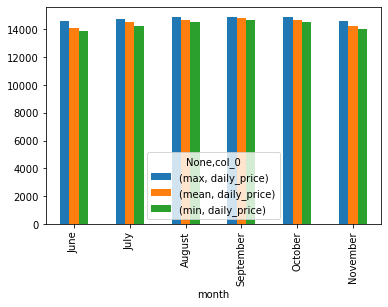

In [50]:
df_tab_vis = df_tab.sort_index().plot(kind='bar')
df_tab_vis

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

,max,mean,min
col_0,daily_price,daily_price,daily_price
month,,,
June,14586.74,14124.307692,13867.95
July,14773.78,14505.603462,14256.13
August,14892.13,14678.022692,14510.27
September,14892.32,14805.981538,14657.30
October,14857.68,14698.504545,14555.88
November,14612.90,14222.720000,14040.16


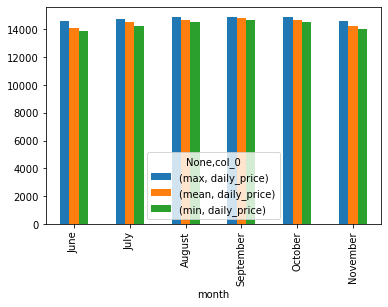

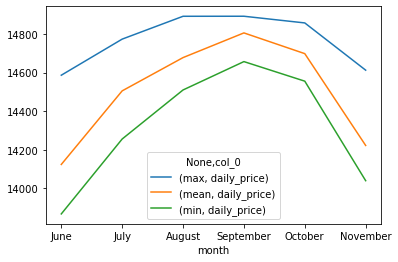

In [51]:
df_tab.sort_index().plot(kind='bar')
df_tab.plot()
df_tab

After carrying out several processes and steps as described earlier, 3 results were obtained from data collection, namely the `minimum value,` the `maximum value` and the `average value` for each month. The data was taken from https://www.exchange-rates.org/history/IDR/USD/T from June 1st, 2020 to November 25th, 2020. \

From the coding process using Pyhton and Jupyter Notebook, i get 4 coclusion that i think important.
1. Maximum exchange rate in **September** = IDR 14,892.32
2. Minimum exchange rate in **June** = IDR 13,867.95
3. Highest average exchange rate in **September** = IDR 14,805.98
4. Lowest average exchange rate in **June** = IDR 14,124.30

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.